In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

full_df = pd.read_csv("FullData.csv")
df  = full_df.groupby(by=["N_Entries", "Concurrence"])

In [211]:
entries = []
conc_indicies = []

train_fid_mean = []
train_fid_std = []
val_fid_mean = []
val_fid_std = []
test_fid_mean = []
test_fid_std = []

nn_fid_mean = []
nn_fid_std = []
nn_mae_mean = []
nn_mae_std = []


for (n, c), frame in df:   #Here frame corresponds to a set of 5 different combinations of the set of N_entries and concs
    entries.append(n)
    conc_indicies.append(c)

    #Mean Fidelity across 5 perms
    train_f = frame["Train_Avg_Fid"].agg(['mean', 'std'])    #collate mean + std dev on each subset of 5 permutations
    train_fid_mean.append(train_f[0])

    #Take largest of std dev of this mean of 5 mean fidelities, or sqrt of squared sum of std devs of these 5 mean fids
    train_std_prop = np.sqrt((frame["Train_StdDev_Fid"]**2).sum())
    tfs = max(train_f[1], train_std_prop)

    if (n == 16):   #always a single run for full tomography
        train_fid_std.append(frame["Train_StdDev_Fid"].to_numpy()[0])
    else:
        train_fid_std.append(tfs)


    val_f = frame["Val_Avg_Fid"].agg(['mean', 'std'])
    val_fid_mean.append(val_f[0])

    val_std_prop = np.sqrt((frame["Val_StdDev_Fid"]**2).sum())
    vfs = max(val_f[1], val_std_prop)

    if (n == 16):   #always a single run for full tomography so just take original std dev from this run
        val_fid_std.append(frame["Val_StdDev_Fid"].to_numpy()[0])
    else:
        val_fid_std.append(vfs)


    test_f = frame["Test_Avg_Fid"].agg(['mean', 'std'])
    test_fid_mean.append(test_f[0])

    test_std_prop = np.sqrt((frame["Test_StdDev_Fid"]**2).sum())
    tefs = max(test_f[1], test_std_prop)

    if (n == 16):   #always a single run for full tomography
        test_fid_std.append(frame["Test_StdDev_Fid"].to_numpy()[0])
    else:
        test_fid_std.append(tefs)

    
    nn_f = frame["NN_Test_Avg_Fid"].agg(['mean', 'std'])
    nn_fid_mean.append(nn_f[0])

    nn_std_prop = np.sqrt((frame["NN_Test_Std_Fid"]**2).sum())
    nnfs = max(nn_f[1], nn_std_prop)

    if (n == 16):   #always a single run for full tomography
        nn_fid_std.append(frame["NN_Test_Std_Fid"].to_numpy()[0])
    else:
        nn_fid_std.append(nnfs)

    
    nn_mae = frame["NN_Test_Avg_MAE"].agg(['mean', 'std'])
    nn_mae_mean.append(nn_mae[0])

    nnm_std_prop = np.sqrt((frame["NN_Test_Std_MAE"]**2).sum())
    nnms = max(nn_mae[1], nnm_std_prop)

    nnms /= np.sqrt(5) #analysing standard error for MAE

    if (n == 16):   #always a single run for full tomography
        nn_mae_std.append(frame["NN_Test_Std_MAE"].to_numpy()[0])
    else:
        nn_mae_std.append(nnms)
    
data = [entries,
        conc_indicies,        
        train_fid_mean,
        train_fid_std,
        val_fid_mean,
        val_fid_std,
        test_fid_mean,
        test_fid_std,
        nn_fid_mean,
        nn_fid_std,
        nn_mae_mean,
        nn_mae_std]

columns = ["Number of Entries", "Concurrence Index",
            "Train Fidelity Mean", "Train Fidelity Stdev", 
            "Val Fidelity Mean", "Val Fidelity Stdev", 
            "Test Fidelity Mean", "Test Fidelity Stdev",
            "NN Fidelity Mean", "NN Fidelity Stdev",
            "NN MAE Mean", "NN MAE Sterr"  ]

In [212]:

final_df = pd.DataFrame(data)
final_df = final_df.transpose()
final_df.columns = columns

final_df.to_csv("Cleaned_Avg_Data_Mix_Conc.csv", index=False)

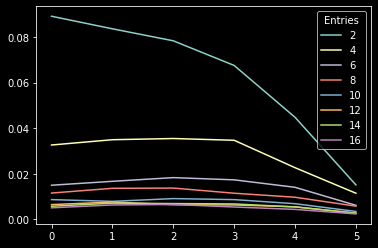

In [213]:
for a in range(2, 17, 2):
    temp = final_df.loc[final_df["Number of Entries"] == a]
    plt.plot(temp["Concurrence Index"], temp["NN MAE Mean"], label = a)

plt.legend(title = "Entries")
